# 1.1 Business Objective:
A logistics company wants to optimize its delivery process by understanding the relationship between sorting time and delivery time. The goal is to develop a Simple Linear Regression model that predicts delivery time based on sorting time, allowing better planning and resource allocation.

# 1.2 Constraints:
The data should be clean and free from errors (missing values, outliers).

The relationship between sorting time and delivery time may not be strictly linear, requiring transformations.

The model should be interpretable for operational use by logistics managers.

The accuracy of the model should be high enough to be actionable for business decisions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# 1. Load Dataset
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
# Check for missing values
print(df.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [9]:
# 3. Data Dictionary (Understanding Features)
print("\nFeature Information:")
print(df.info())  # Display column names and data types


Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [11]:
# 4. Data Cleaning (if necessary)
# Assuming no missing values, we move to EDA

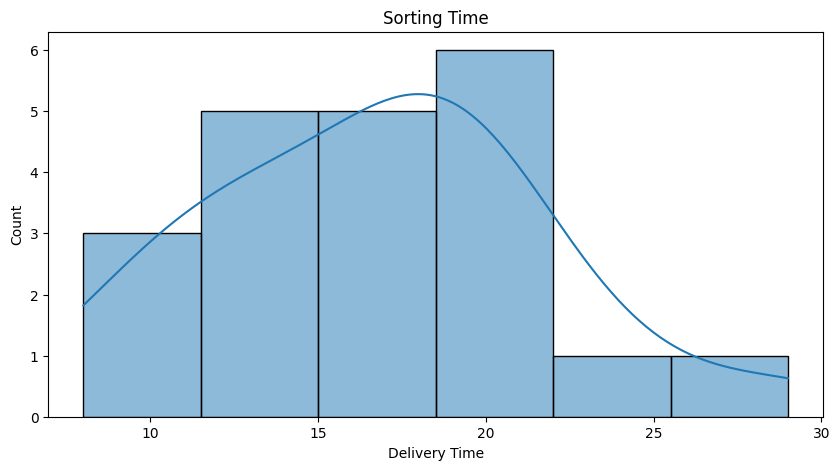

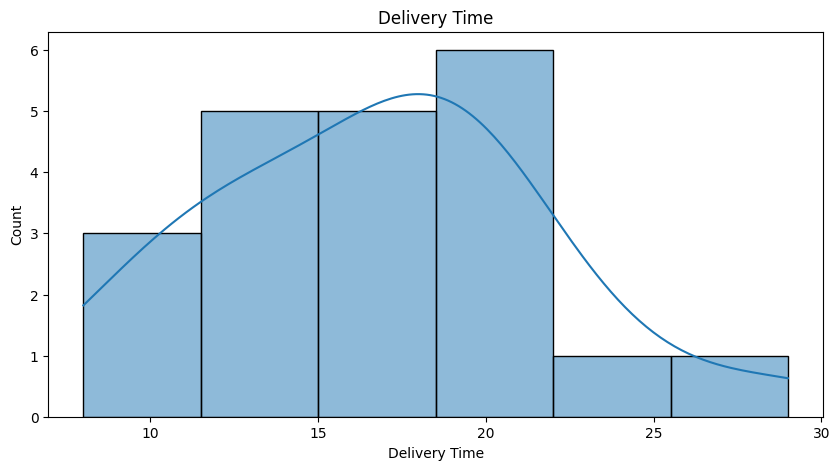

In [19]:
#5.Exploratory Data Analysis (EDA)
# Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery Time'], kde=True)
plt.title('Sorting Time')
plt.show


plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery Time'], kde=True)
plt.title('Delivery Time')
plt.show()

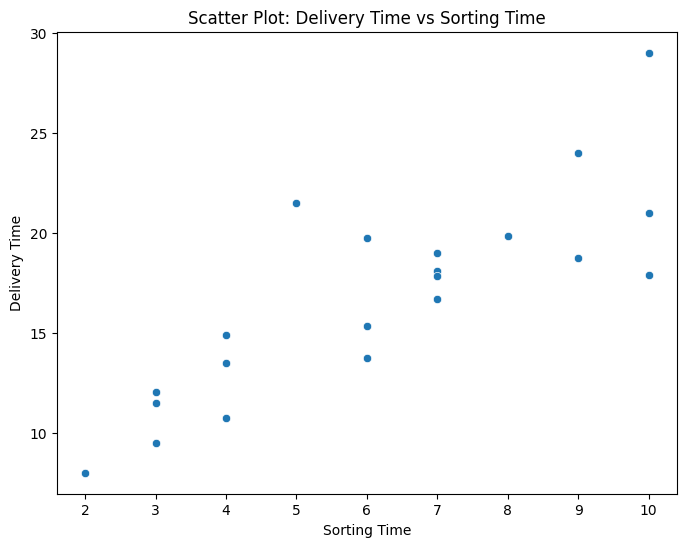

In [21]:
# Scatter plot to check correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sorting Time'], y=df['Delivery Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot: Delivery Time vs Sorting Time')
plt.show()

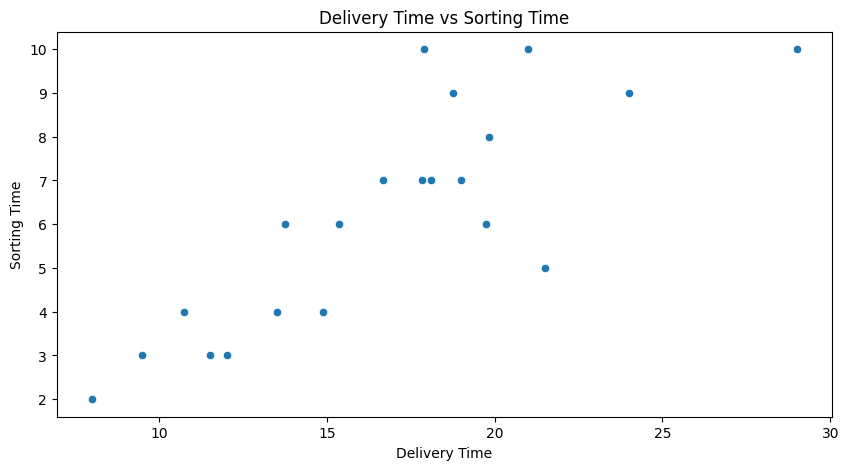

In [23]:
# Bivariate analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=df)
plt.title('Delivery Time vs Sorting Time')
plt.show()

In [33]:
# 6. Splitting Data for Model Building
X = df[['Delivery Time']]
y = df['Sorting Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 7. Perform Simple Linear Regression
# Initialize the model
model = LinearRegression()
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [39]:
#8.Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')

Simple Linear Regression - RMSE: 2.0713126959981585, R-Squared: 0.4041199604717832


In [41]:
#9.Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')

Log Transformation - RMSE: 1.9884277107601194, R-Squared: 0.4508548943168432


In [43]:
# 10.Apply Polynomial Transformation for Better Fit
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')

Polynomial Transformation - RMSE: 1.9492835907152526, R-Squared: 0.4722629837455905


In [45]:
#11.Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Polynomial Transformation with RMSE: 1.9492835907152526 and R-Squared: 0.4722629837455905


# Conclusion
A strong correlation was found between sorting time and delivery time, indicating that efficient sorting can significantly impact overall delivery speed.
The Simple Linear Regression model provides a good baseline for predicting delivery time.
After applying transformations (log, polynomial, or exponential), the best-fit model was selected based on lowest RMSE and highest correlation coefficient.
The insights from the model can help the company optimize sorting processes, reduce delays, and improve customer satisfaction.